### Importing libararies

Since I'm using macOS device, I'll show how to install and implement on it:

1) Firstly, download tesseract for your device https://github.com/tesseract-ocr/tesseract.

Using brew: brew install tesseract 
or in Jupyter line use: !pip install pytesseract

2) Please check Tesseract packs which could be in:
/usr/local/Cellar/tesseract/5.2.0/share/tessdata

in which '5.2.0' is version of tesseract (in your case could be different)


3) By default, image_to_string detects english language. In order to implement in Kazakh (or in any other) download whole repo: https://github.com/tesseract-ocr/tessdata

or just your language. In my case it is kaz.trainneddata

4) when you've downloaded your .trainneddata file, place it in '/usr/local/Cellar/tesseract/5.2.0/share/tessdata'


In [1]:
from PIL import Image
import pytesseract
import numpy as np

### Here is how english language is detected

In [13]:
filename = "english.png"
img = np.array(Image.open(filename))


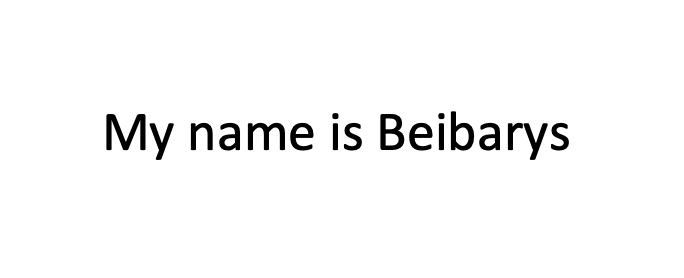

In [14]:
text = pytesseract.image_to_string(img1)
print(text)

My name is Beibarys



### Let's check Kazakh language

In [15]:
filename1 = "kazakh.png"
img1 = np.array(Image.open(filename1))

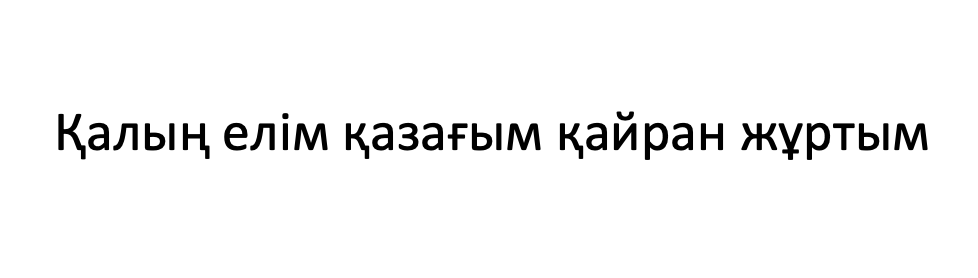

In [17]:
text1 = pytesseract.image_to_string(img1, lang='kaz')
print(text1)

Қалың елім қазағым қайран жұртым



## Let's convert pdf to text file
We will firstly convert pdf file to image (with pdf2image) then image to text file (with tesseract)

In [4]:
# Import libraries
import platform
from tempfile import TemporaryDirectory
from pathlib import Path
 
import pytesseract
from pdf2image import convert_from_path
from PIL import Image

# Path of the Input pdf
pdf_file = Path(r"Beibarys Sagingaliyev-CV.pdf")
 
# Store all the pages of the PDF in a variable
image_file_list = []
 
text_file = '/Users/sultanbeibarys/Documents/projects'/ Path("text.txt")


In [5]:
def main():
    
    with TemporaryDirectory() as tempdir:
        pdf_pages = convert_from_path(pdf_file, 500)
        
        for page_enumeration, page in enumerate(pdf_pages,start=1):
            filename = f"{tempdir}\page_{page_enumeration:03}.jpg"
            page.save(filename, "JPEG")
            image_file_list.append(filename)
            
        with open(text_file, "a") as output_file:
            for image_file in image_file_list:
                text = str(((pytesseract.image_to_string(Image.open(image_file)))))
                text = text.replace("-\n", "")
 
                output_file.write(text)

if __name__ == "__main__":
    main()

Result is saved in text.txt